# Trabalho 2

Curso de Data Science
Prof. MSc. Eng. Marcelo Bianchi

Trabalho 2 – Curso de Data Science
Integrantes do Grupo: 
- Carlos
- Israel
- Lenilson
- Nara


Dataset: Heart Failure Clinical Records
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Attribute Information:

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean) 

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [106]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

In [107]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [108]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [109]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [111]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [112]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [113]:
features = pd.DataFrame(data=data, columns=[column for column in data.columns if column != 'DEATH_EVENT' ])
target = pd.DataFrame(data=data, columns=['DEATH_EVENT'])


In [114]:
target.shape

(299, 1)

In [115]:
features.shape

(299, 12)

In [116]:
target.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [117]:
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [118]:
features.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

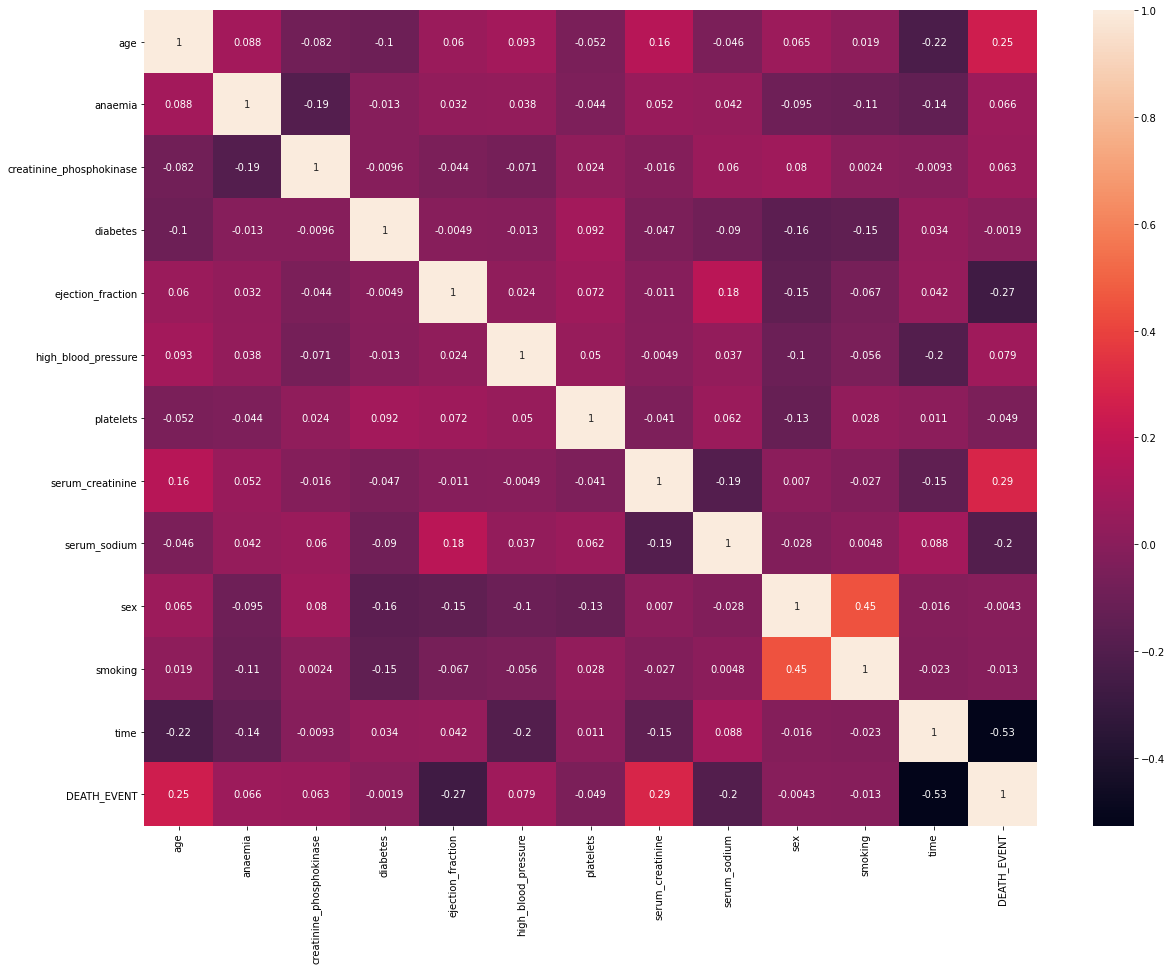

In [119]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)


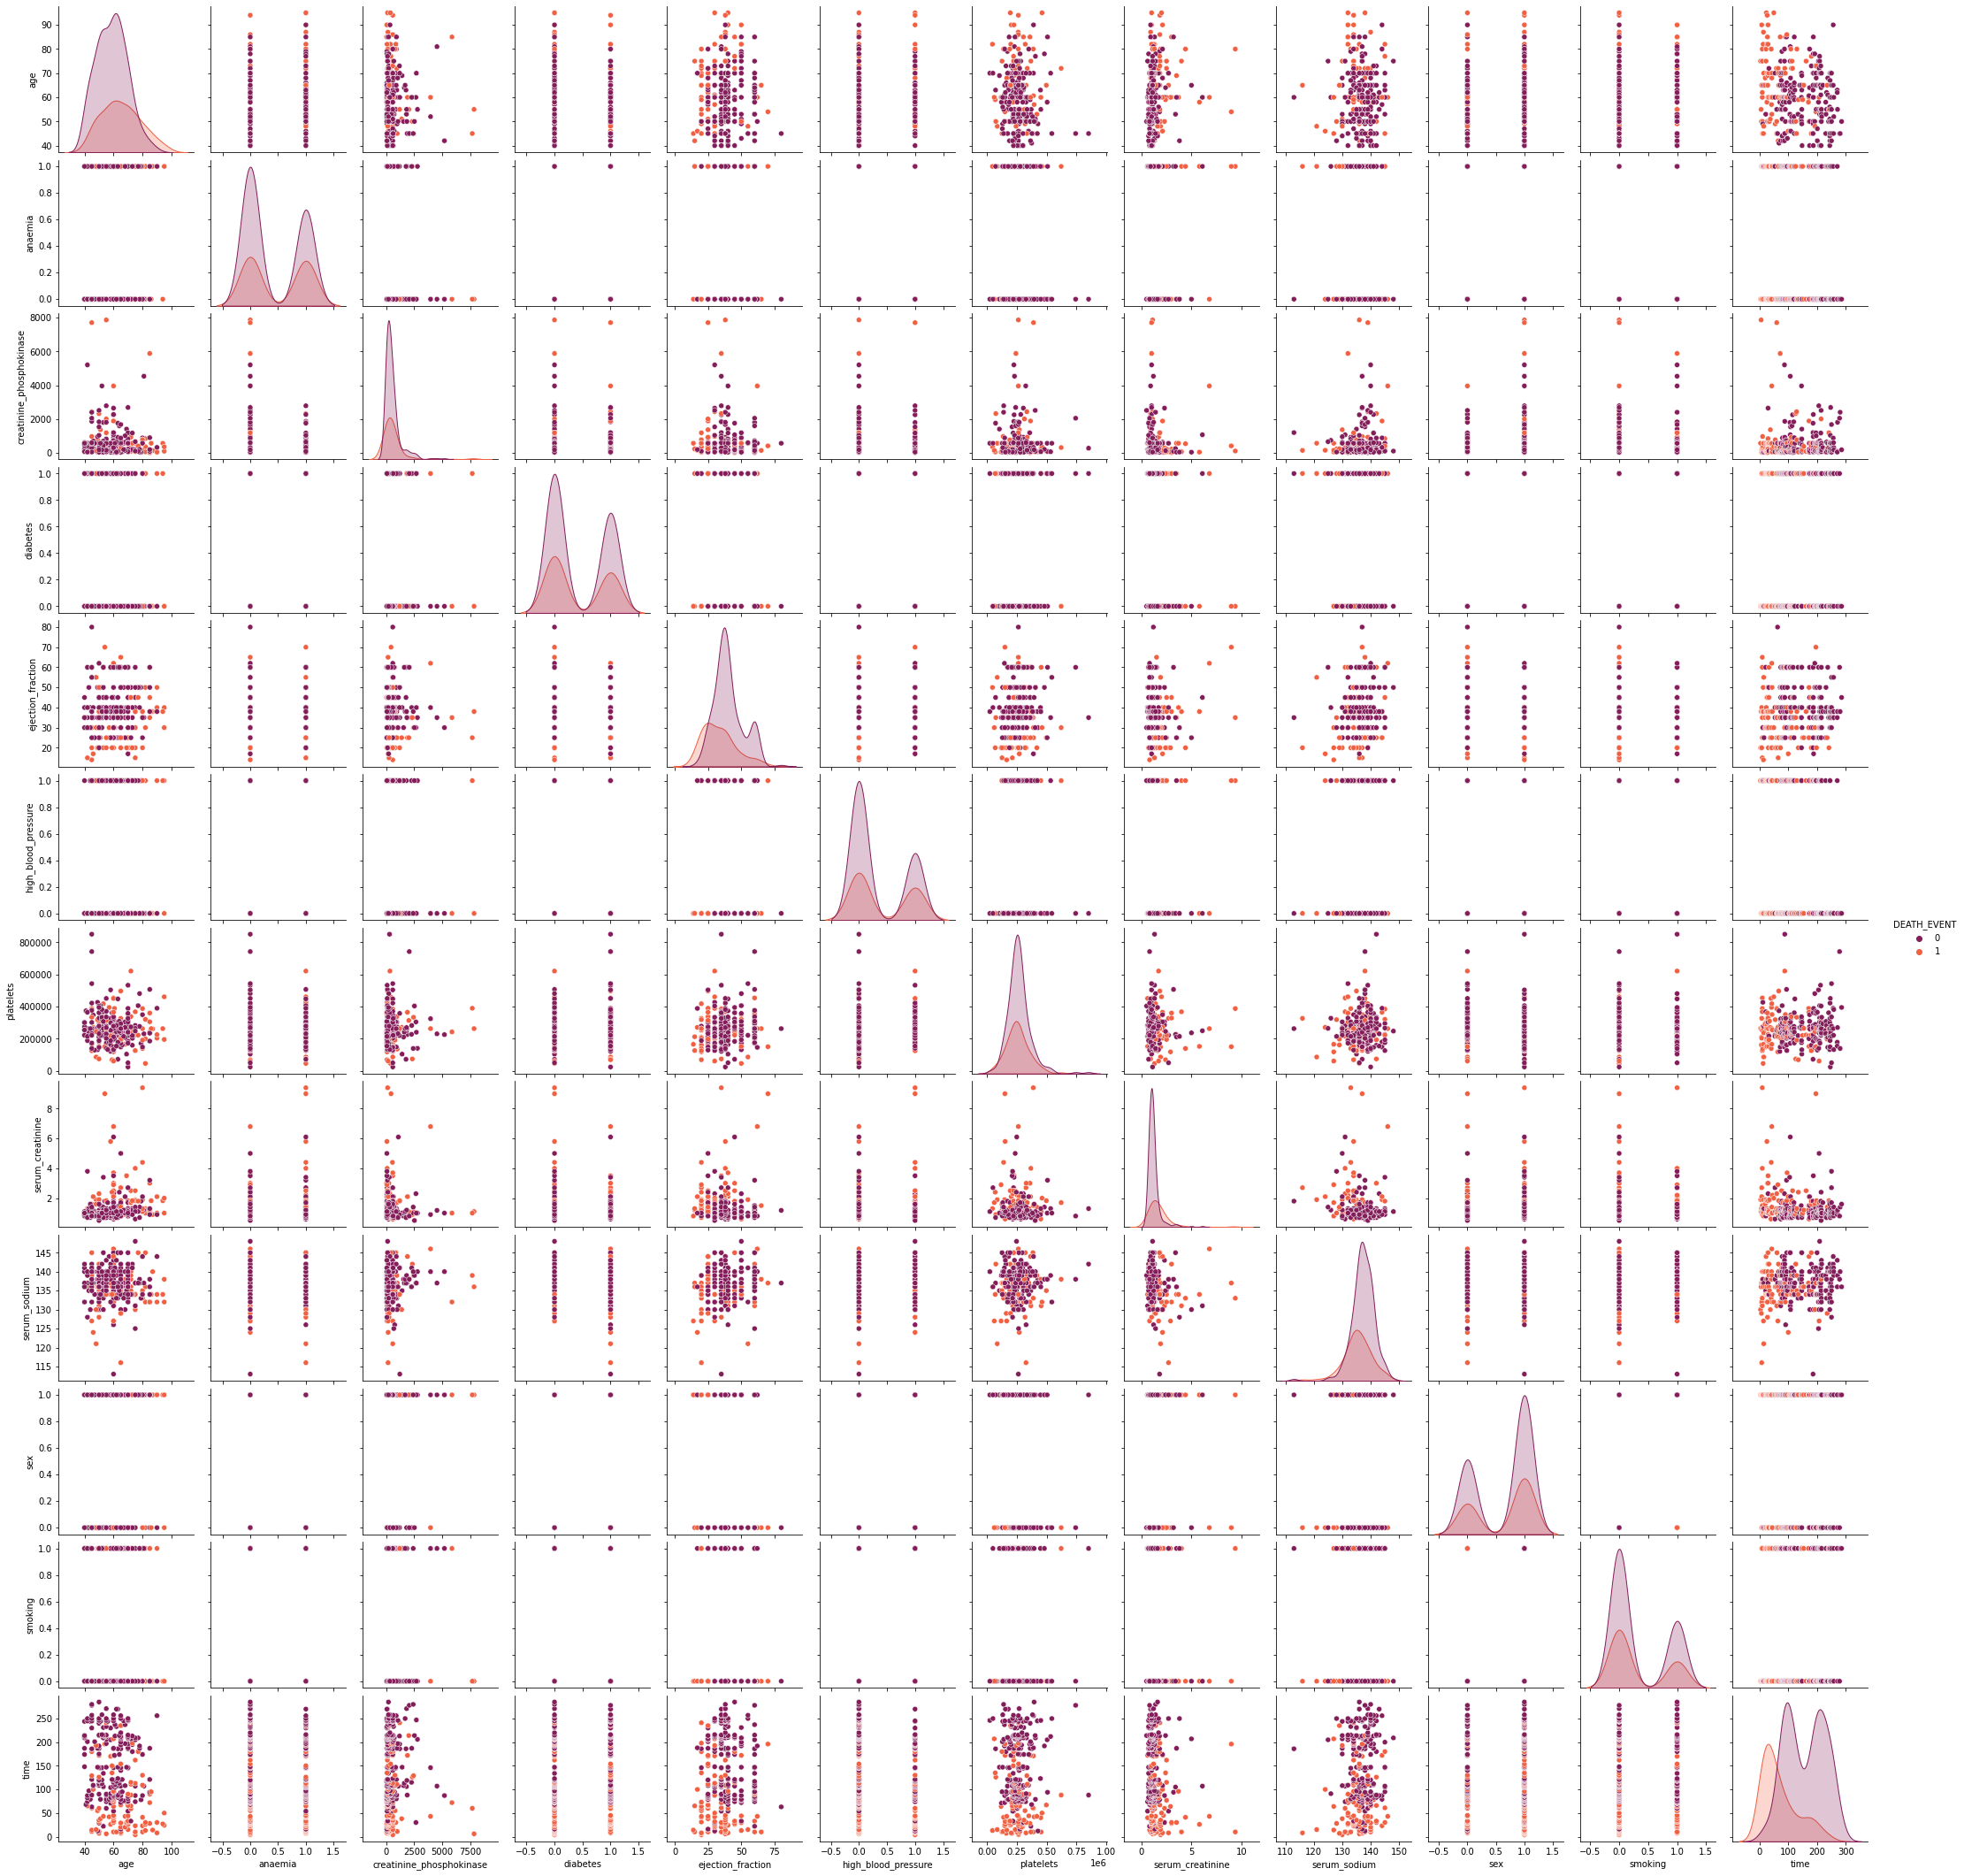

In [120]:
sns.pairplot(data=data, hue='DEATH_EVENT', palette = 'rocket')

## 2) Dividir o Dataset entre Training e Test sets

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, np.ravel(target), test_size=0.1, stratify = np.ravel(target),random_state=42)


## 3) Aplicar Feature Scaling (Se for aplicável, senão for então justificar)

In [122]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std[:,0:5])

[[-0.78827532 -0.89742361 -0.46634859 -0.87072954 -0.69481329]
 [ 0.7530471  -0.89742361 -0.50515425 -0.87072954 -0.27366688]
 [-0.53138825 -0.89742361  0.14658192 -0.87072954  0.56862593]
 ...
 [-0.10324314  1.11430098  0.47891761  1.14846224  0.56862593]
 [-0.10324314 -0.89742361 -0.36386183  1.14846224 -0.02097904]
 [-1.04516239  1.11430098 -0.52903466 -0.87072954  0.98977233]]


## 4) Aplicar Dummy Variable (Se for aplicável, senão for então  justificar) 

Não existem variáveis categóricas no dataset escolhido, por essa razão, não se faz necessária a aplicação da técnica de Dummy Variables

In [123]:
# Não precisa, pois os dados são numéricos ou binários:
features.dtypes
list_bin = []

for i in range(X_train_std.shape[1]):
    if len(np.unique(X_train_std[:,i])) == 2:
        list_bin.append(i) 
list_feat = [x for x in range(12) if x not in list_bin]       
X_train_std_bin = X_train_std[:, list_bin]
X_train_std_Nbin = X_train_std[:, list_feat]
X_test_std_bin = X_test_std[:, list_bin]
X_test_std_Nbin = X_test_std[:, list_feat]

print(X_train_std_bin.shape)
print(X_train_std_Nbin.shape)
print(X_test_std_bin.shape)
print(X_test_std_Nbin.shape)

(269, 5)
(269, 7)
(30, 5)
(30, 7)


## 5) Aplicar e Comparar os resultados dos algoritmos de Classificação 

### 5.1) Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()

In [125]:
#Treinando com tudo
model_LR.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
y_pred_LR = model_LR.predict(X_test_std)

Text(0.5, 15.0, 'Resultado Predito')

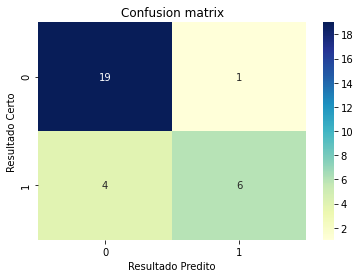

In [127]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [128]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.84      0.77      0.79        30
weighted avg       0.84      0.83      0.82        30



              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


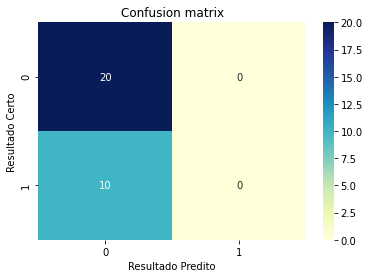

In [129]:
#Treinando em Separado
#X_Bin
model_LR.fit(X_train_std_bin, y_train)
y_pred_LR = model_LR.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.84      0.77      0.79        30
weighted avg       0.84      0.83      0.82        30



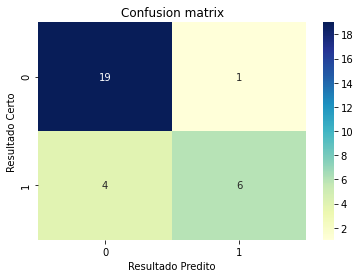

In [130]:
#Treinando em Separado
#X_NBin
model_LR.fit(X_train_std_Nbin, y_train)
y_pred_LR = model_LR.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_LR)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_LR))

### 5.2) KNN - K Nearest Neighborhood

In [145]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_std,y_train)
    
    train_scores.append(knn.score(X_train_std,y_train))
    test_scores.append(knn.score(X_test_std,y_test))

In [146]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.3f} % and k = {1}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.000 % and k = [1]


In [147]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.3f} % and k = {1}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 73.333 % and k = [2, 8, 9, 14]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


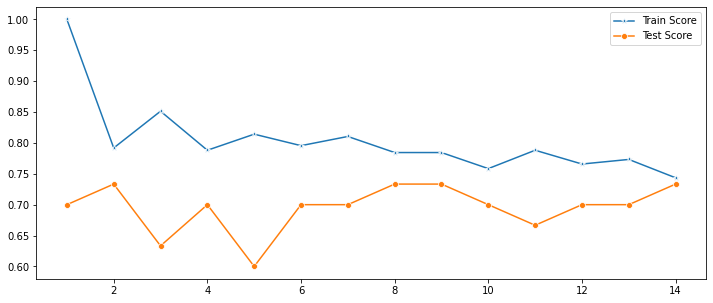

In [148]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [149]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.6666666666666666

Avaliando os hiperparâmetros de k

Text(0.5, 15.0, 'Resultado Predito')

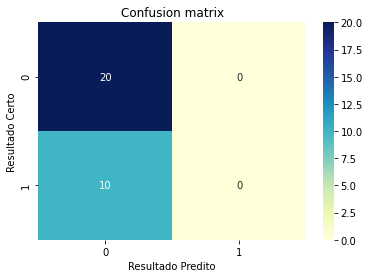

In [150]:
#Confusion Matrix

y_pred_knn = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [151]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max train score 70.632 % and k = [9, 11]
Max test score 66.667 % and k = [1, 2, 9, 10, 14]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.50      0.10      0.17        10

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



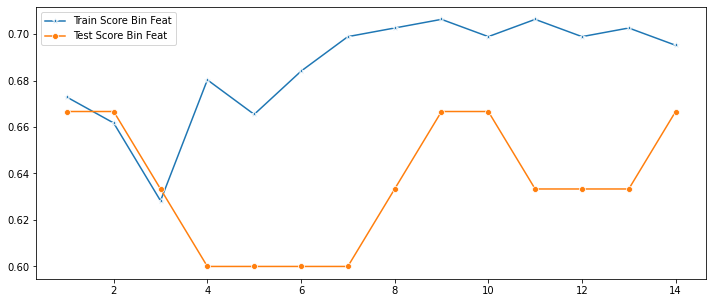

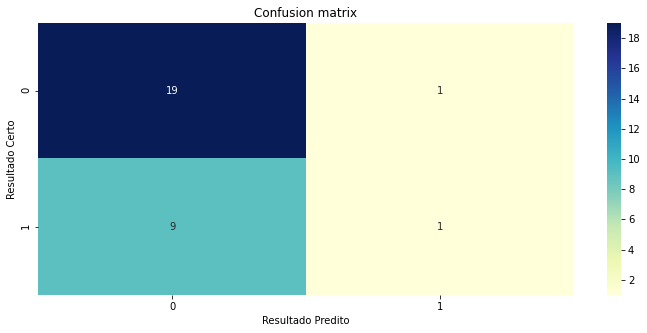

In [152]:
# Treinando para Bin


test_scores = []
train_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_std_bin,y_train)
    
    train_scores.append(knn.score(X_train_std_bin,y_train))
    test_scores.append(knn.score(X_test_std_bin,y_test))


## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.3f} % and k = {1}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.3f} % and k = {1}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score Bin Feat')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score Bin Feat')


knn = KNeighborsClassifier(14)

knn.fit(X_train_std_bin,y_train)
knn.score(X_test_std_bin,y_test)

y_pred_knn = knn.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

print(classification_report(y_test, y_pred_knn))

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           0       0.68      0.95      0.79        20
           1       0.50      0.10      0.17        10

    accuracy                           0.67        30
   macro avg       0.59      0.53      0.48        30
weighted avg       0.62      0.67      0.58        30



Max train score 100.000 % and k = [1]
Max test score 83.333 % and k = [5]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.83      0.50      0.62        10

    accuracy                           0.80        30
   macro avg       0.81      0.72      0.74        30
weighted avg       0.81      0.80      0.78        30



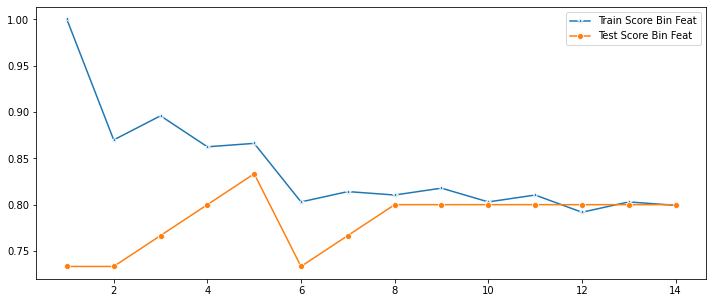

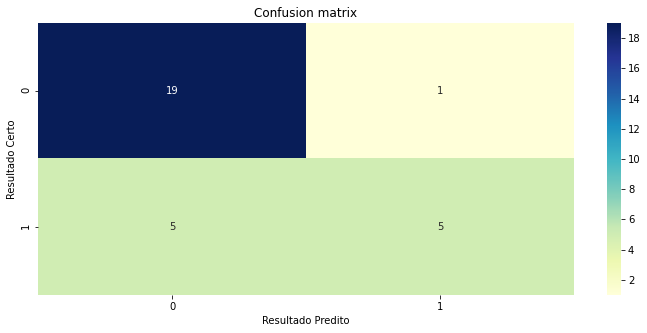

In [154]:
# Treinando para não Bin


test_scores = []
train_scores = []
for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_std_Nbin,y_train)
    
    train_scores.append(knn.score(X_train_std_Nbin,y_train))
    test_scores.append(knn.score(X_test_std_Nbin,y_test))


## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {0:.3f} % and k = {1}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {0:.3f} % and k = {1}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))


plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score Bin Feat')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score Bin Feat')


knn = KNeighborsClassifier(14)

knn.fit(X_train_std_Nbin,y_train)
knn.score(X_test_std_Nbin,y_test)

y_pred_knn = knn.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

print(classification_report(y_test, y_pred_knn))

In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn, zero_division = 0))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.83      0.50      0.62        10

    accuracy                           0.80        30
   macro avg       0.81      0.72      0.74        30
weighted avg       0.81      0.80      0.78        30



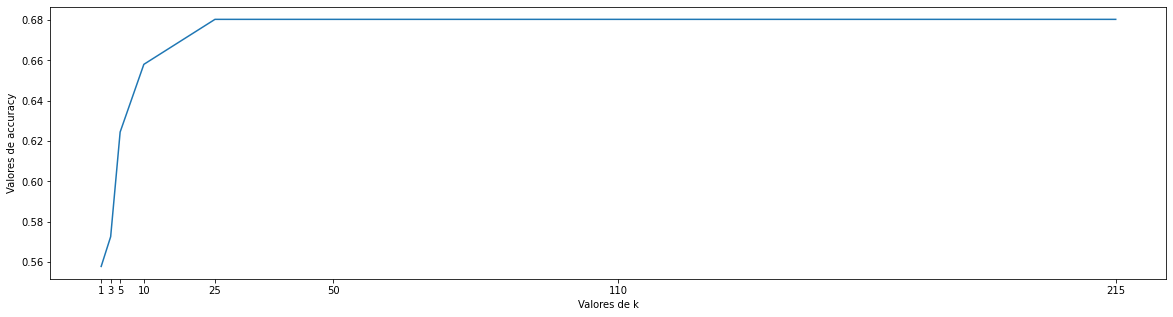

In [156]:
from sklearn.model_selection import cross_val_score

accuracy_list = []

Ks = [1, 3, 5, 10, 25, 50, 110, 215]

for k in Ks:

  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv = 5)

  accuracy_list.append(scores.mean())

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(Ks, accuracy_list)
ax.set(xlabel="Valores de k", ylabel="Valores de accuracy", xticks=Ks)
plt.show()

### 5.3) SVM - Support Vector Machines

In [204]:
from sklearn.svm import SVC

model_svc = SVC(kernel='poly')

In [205]:
model_svc.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [206]:
y_pred_svc = model_svc.predict(X_test_std)

Text(0.5, 15.0, 'Resultado Predito')

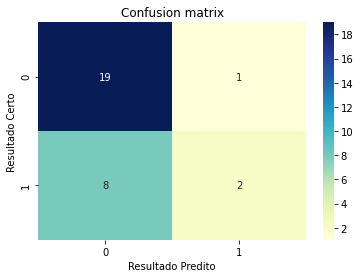

In [207]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [208]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.95      0.81        20
           1       0.67      0.20      0.31        10

    accuracy                           0.70        30
   macro avg       0.69      0.57      0.56        30
weighted avg       0.69      0.70      0.64        30



In [209]:
# Fazer gráficos

### 5.4) Kernel SVM

In [ ]:
from sklearn.svm import SVC

# usando kernel polinomial
model_svc_kernel = SVC(kernel='rbf', gamma = 0.1)

In [ ]:
model_svc_kernel.fit(X_train, y_train)

In [ ]:
y_pred_svc_kernel = model_svc_kernel.predict(X_test)

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_svc_kernel))

In [ ]:
# Fazer gráficos

model_svc_kernel.fit(X_train_std_bin, y_train)
y_pred_svc_kernel = model_svc_kernel.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_svc_kernel))

In [ ]:
model_svc_kernel.fit(X_train_std_Nbin, y_train)
y_pred_svc_kernel = model_svc_kernel.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_svc_kernel))

### 5.5) Naive Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naive_bays = GaussianNB()


In [ ]:
model_naive_bays.fit(X_train_std, y_train)

In [ ]:
y_pred_naive_bays = model_naive_bays.predict(X_test_std)

In [ ]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [ ]:
print(classification_report(y_test, y_pred_naive_bays))

In [ ]:
# Fazer gráficos
model_naive_bays.fit(X_train_std_bin, y_train)
y_pred_naive_bays = model_naive_bays.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_naive_bays))

In [ ]:
model_naive_bays.fit(X_train_std_Nbin, y_train)
y_pred_naive_bays = model_naive_bays.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_naive_bays)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_naive_bays))

### 5.6) Decision Tree (Classification)

In [182]:
from sklearn import tree
model_dtc = tree.DecisionTreeClassifier()

In [183]:
model_dtc.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [184]:
y_pred_dtc = model_dtc.predict(X_test_std)

Text(0.5, 15.0, 'Resultado Predito')

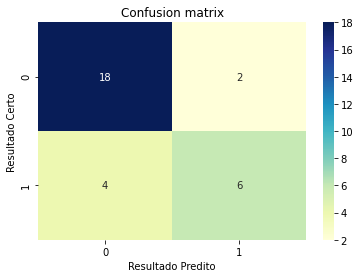

In [185]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [186]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.78      0.75      0.76        30
weighted avg       0.80      0.80      0.79        30



              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.25      0.10      0.14        10

    accuracy                           0.60        30
   macro avg       0.45      0.47      0.44        30
weighted avg       0.52      0.60      0.54        30



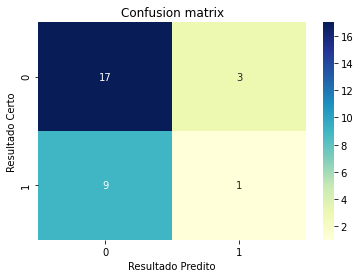

In [187]:
# Fazer gráficos

model_dtc.fit(X_train_std_bin, y_train)
y_pred_dtc = model_dtc.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_dtc))

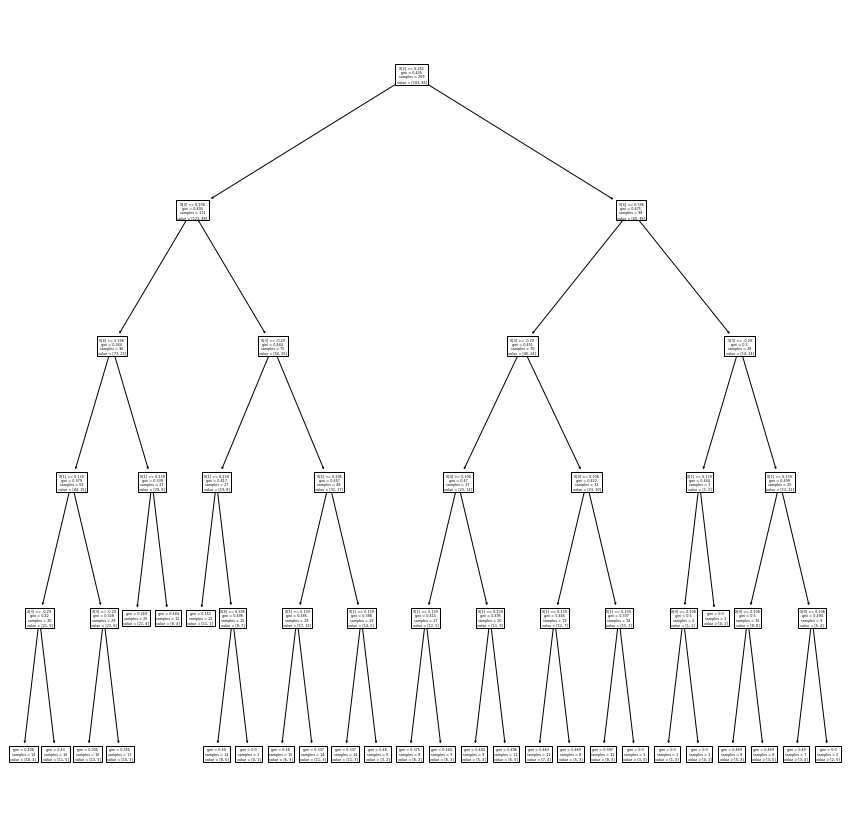

In [203]:
plot1 = model_dtc.fit(X_train_std_bin, y_train)
plt.figure(figsize=(15, 15))
tree.plot_tree(plot1);

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        20
           1       0.86      0.60      0.71        10

    accuracy                           0.83        30
   macro avg       0.84      0.77      0.79        30
weighted avg       0.84      0.83      0.82        30



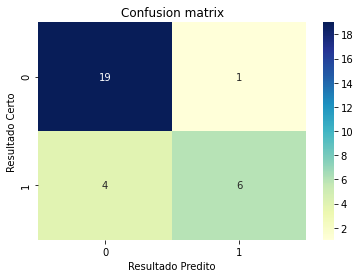

In [189]:
model_dtc.fit(X_train_std_Nbin, y_train)
y_pred_dtc = model_dtc.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dtc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_dtc))

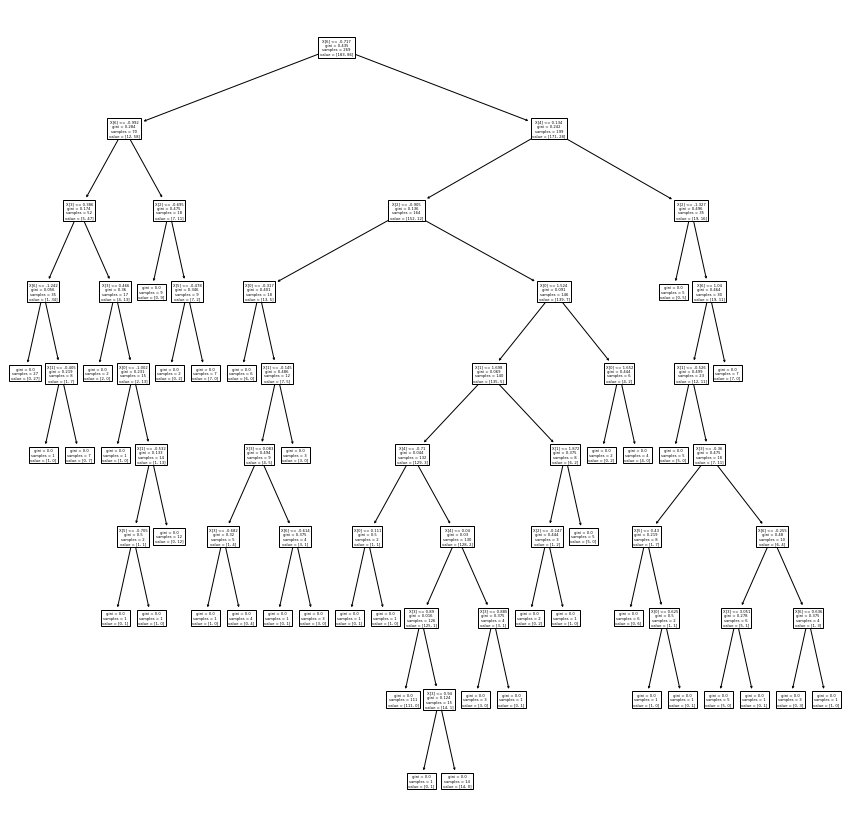

In [190]:
plot2 = model_dtc.fit(X_train_std_Nbin, y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(plot2);

### 5.7) Random Forest (Classification)

In [239]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

In [240]:
model_rfc.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [241]:
y_pred_rfc = model_rfc.predict(X_test_std)

Text(0.5, 15.0, 'Resultado Predito')

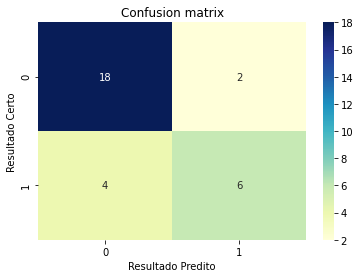

In [242]:
#Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

In [243]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.75      0.60      0.67        10

    accuracy                           0.80        30
   macro avg       0.78      0.75      0.76        30
weighted avg       0.80      0.80      0.79        30



              precision    recall  f1-score   support

           0       0.65      0.85      0.74        20
           1       0.25      0.10      0.14        10

    accuracy                           0.60        30
   macro avg       0.45      0.47      0.44        30
weighted avg       0.52      0.60      0.54        30



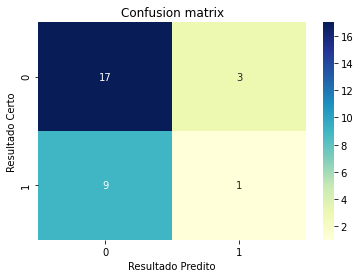

In [244]:
# Fazer gráficos

model_rfc.fit(X_train_std_bin, y_train)
y_pred_rfc = model_rfc.predict(X_test_std_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))




In [245]:
n_nodes = model_rfc.estimators_[0].tree_.node_count
n_nodes

51

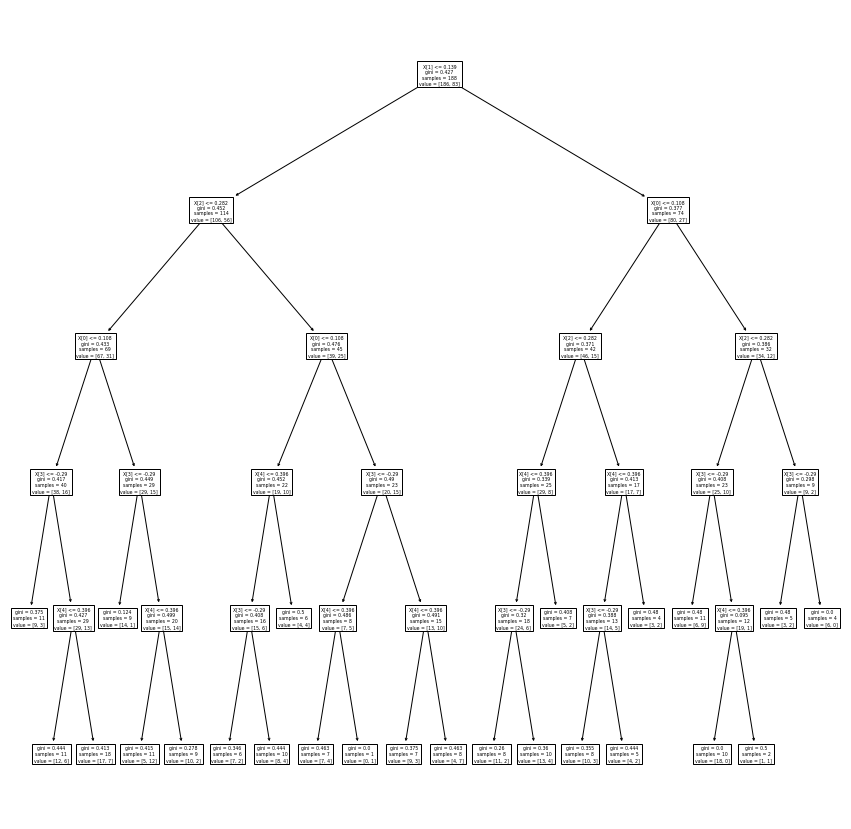

In [246]:
plt.figure(figsize=(15,15))
for index in range(0, 5):
    tree.plot_tree(model_rfc.estimators_[index]);

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.67      0.60      0.63        10

    accuracy                           0.77        30
   macro avg       0.74      0.72      0.73        30
weighted avg       0.76      0.77      0.76        30



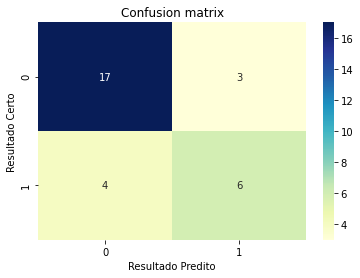

In [247]:
model_rfc.fit(X_train_std_Nbin, y_train)
y_pred_rfc = model_rfc.predict(X_test_std_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))

In [248]:
n_nodes = model_rfc.estimators_[0].tree_.node_count
n_nodes

61

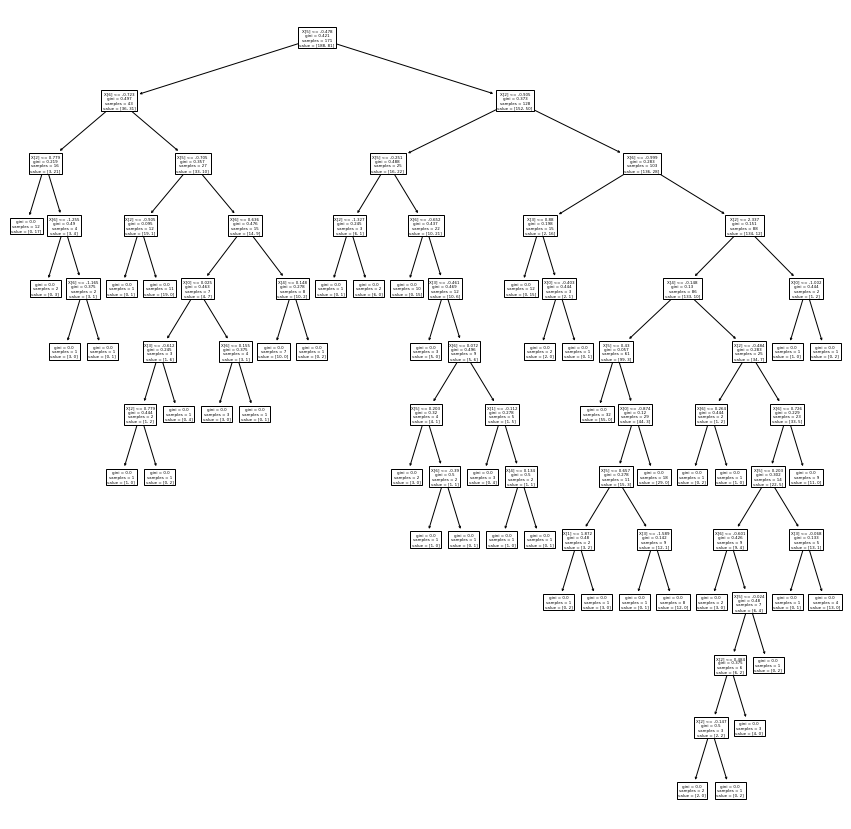

In [249]:
plt.figure(figsize=(15,15))
for index in range(0, 5):
    tree.plot_tree(model_rfc.estimators_[index]);

## Conclusão: o melhor modelo

In [228]:
#Testando hipóteses Interessantes

X = features.values
y = target.values
acc_bin_feat = []
for i in list_bin:
    acc_bin_feat.append(np.mean(X[:,i] == y))
    print('Accuracia usando {0} como caracteristica de classficação: {1:.3f}'.format(features.columns[i], 
                                                                                     acc_bin_feat[-1]))


Accuracia usando anaemia como caracteristica de classficação: 0.525
Accuracia usando diabetes como caracteristica de classficação: 0.529
Accuracia usando high_blood_pressure como caracteristica de classficação: 0.553
Accuracia usando sex como caracteristica de classficação: 0.447
Accuracia usando smoking como caracteristica de classficação: 0.564


[0.38388358 0.13449121 0.1181064  0.08816987 0.08003379 0.07322486
 0.06338903 0.01408861 0.01301837 0.01143637 0.01019292 0.00996497]
(269, 3)
(30, 3)
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        20
           1       0.38      0.30      0.33        10

    accuracy                           0.60        30
   macro avg       0.53      0.53      0.52        30
weighted avg       0.58      0.60      0.59        30



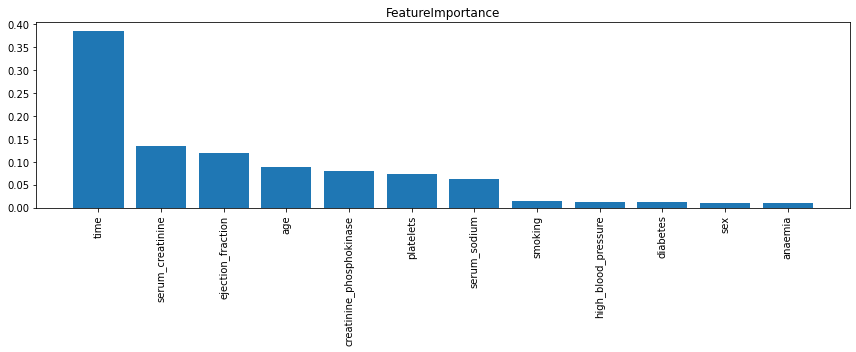

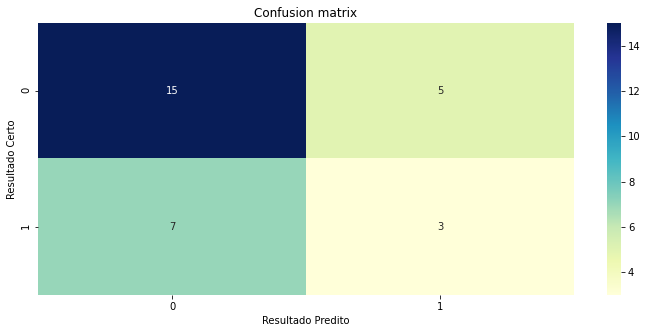

In [229]:
#Extraindo as caracteristicas baseadas no grau de impureza do randomForest

model_rfc.fit(X_train_std, y_train)
importancias = model_rfc.feature_importances_
indices = np.argsort(importancias)[::-1]
print(importancias[indices])

#Visualizando as Importancias
plt.figure(figsize=(12,5))
plt.title('FeatureImportance')
plt.bar(range(X_train.shape[1]),
        importancias[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
            features.columns[indices],
            rotation = 90)
plt.tight_layout()

#escolhendo as Importancias
X_train_escolhido = X_train_std[:, importancias[indices] >= 0.1]
X_test_escolhido = X_test_std[:, importancias[indices] >= 0.1]
print(X_train_escolhido.shape)
print(X_test_escolhido.shape)


model_rfc.fit(X_train_escolhido, y_train)
y_pred_rfc = model_rfc.predict(X_test_escolhido)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))



[ 1  3  9 10  5]
[ True  True  True False False]
(269, 2)
(30, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.33      0.50      0.40        30
weighted avg       0.44      0.67      0.53        30



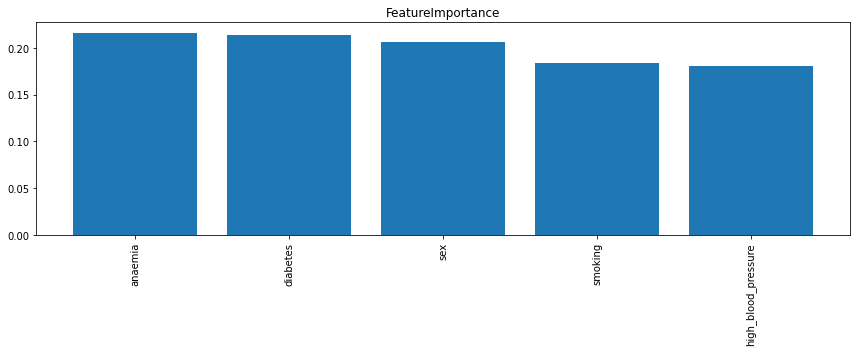

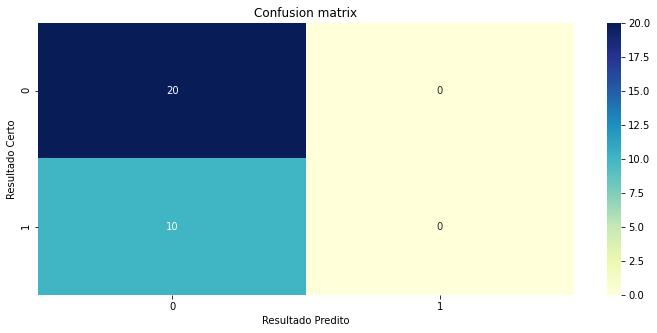

In [230]:
#Extraindo as caracteristicas baseadas no grau de impureza do randomForest

model_rfc.fit(X_train_std_bin, y_train)
importancias = model_rfc.feature_importances_
indices = np.argsort(importancias)[::-1]
list_bin = np.array(list_bin)
print(list_bin[indices])
print(importancias[indices] > 0.2)

#Visualizando as Importancias
plt.figure(figsize=(12,5))
plt.title('FeatureImportance')
plt.bar(range(X_train_std_bin.shape[1]),
        importancias[indices],
        align = 'center')
plt.xticks(range(X_train_std_bin.shape[1]),
            features.columns[list_bin[indices]],
            rotation = 90)
plt.tight_layout()

#escolhendo as Importancias
X_train_escolhido_bin = X_train_std_bin[:, importancias[indices] < 0.2]
X_test_escolhido_bin = X_test_std_bin[:, importancias[indices] < 0.2]
print(X_train_escolhido_bin.shape)
print(X_test_escolhido_bin.shape)


model_rfc.fit(X_train_escolhido_bin, y_train)
y_pred_rfc = model_rfc.predict(X_test_escolhido_bin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))

[11  7  4  0  6  2  8]
[0.39332919 0.15361748 0.12930111 0.09515595 0.08159298 0.07759327
 0.06941001]
(269, 4)
(30, 4)
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.82      0.80      0.81        30
weighted avg       0.83      0.83      0.83        30



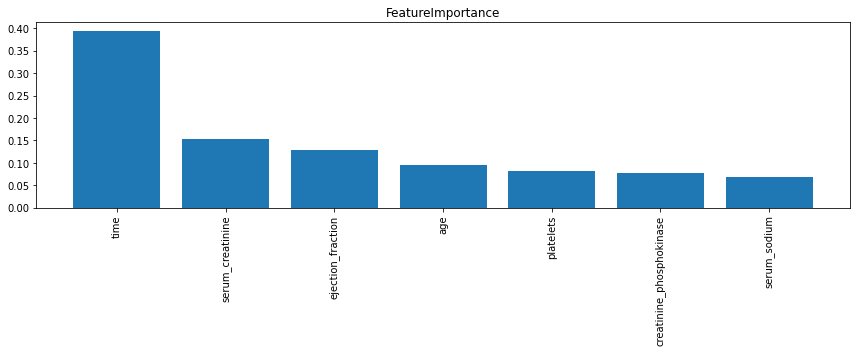

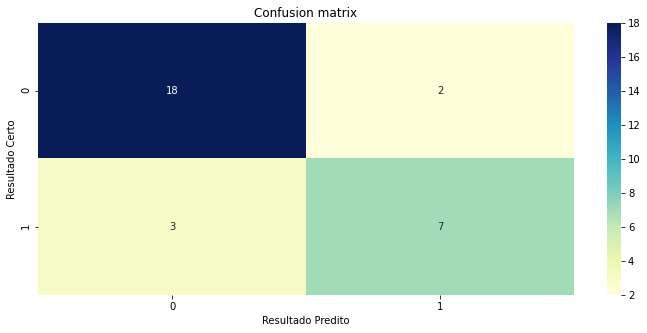

In [231]:
#Extraindo as caracteristicas baseadas no grau de impureza do randomForest

model_rfc.fit(X_train_std_Nbin, y_train)
importancias = model_rfc.feature_importances_
indices = np.argsort(importancias)[::-1]
list_feat = np.array(list_feat)
print(list_feat[indices])
print(importancias[indices])

#Visualizando as Importancias
plt.figure(figsize=(12,5))
plt.title('FeatureImportance')
plt.bar(range(X_train_std_Nbin.shape[1]),
        importancias[indices],
        align = 'center')
plt.xticks(range(X_train_std_Nbin.shape[1]),
            features.columns[list_feat[indices]],
            rotation = 90)
plt.tight_layout()

#escolhendo as Importancias
X_train_escolhido_Nbin = X_train_std_Nbin[:, importancias[indices] < 0.1]
X_test_escolhido_Nbin = X_test_std_Nbin[:, importancias[indices] < 0.1]
print(X_train_escolhido_Nbin.shape)
print(X_test_escolhido_Nbin.shape)


model_rfc.fit(X_train_escolhido_Nbin, y_train)
y_pred_rfc = model_rfc.predict(X_test_escolhido_Nbin)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.78      0.70      0.74        10

    accuracy                           0.83        30
   macro avg       0.82      0.80      0.81        30
weighted avg       0.83      0.83      0.83        30



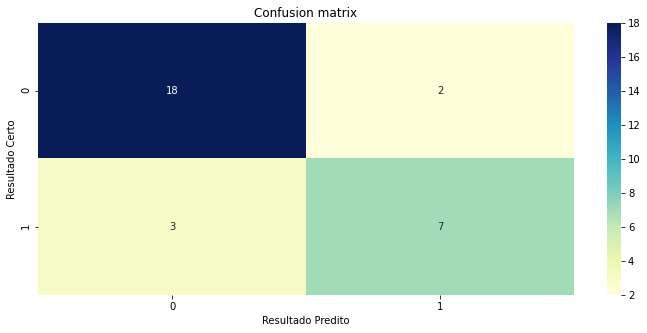

In [232]:
#Tentando combinar Classificadores 

model_rfc_bin = RandomForestClassifier()
model_rfc_Nbin = RandomForestClassifier()
model_rfc_MIX = RandomForestClassifier()

model_rfc_bin.fit(X_train_escolhido_bin, y_train)
model_rfc_Nbin.fit(X_train_escolhido_Nbin, y_train)

#dados_treinamento_classificador_misto
x1 = model_rfc_bin.predict(X_train_escolhido_bin)
x2 = model_rfc_Nbin.predict(X_train_escolhido_Nbin)
x3 = np.concatenate((x1.reshape(-1,1),x2.reshape(-1,1)), axis = 1)

#dados_test_classificador_misto
x1_test = model_rfc_bin.predict(X_test_escolhido_bin)
x2_test = model_rfc_Nbin.predict(X_test_escolhido_Nbin)
x3_test = np.concatenate((x1_test.reshape(-1,1),x2_test.reshape(-1,1)), axis = 1)



model_rfc_MIX.fit(x3, y_train)
y_pred_rfc = model_rfc_MIX.predict(x3_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))


In [233]:
print(list_bin)

[ 1  3  5  9 10]


In [234]:
df_bin = features[features.columns[list_bin]]

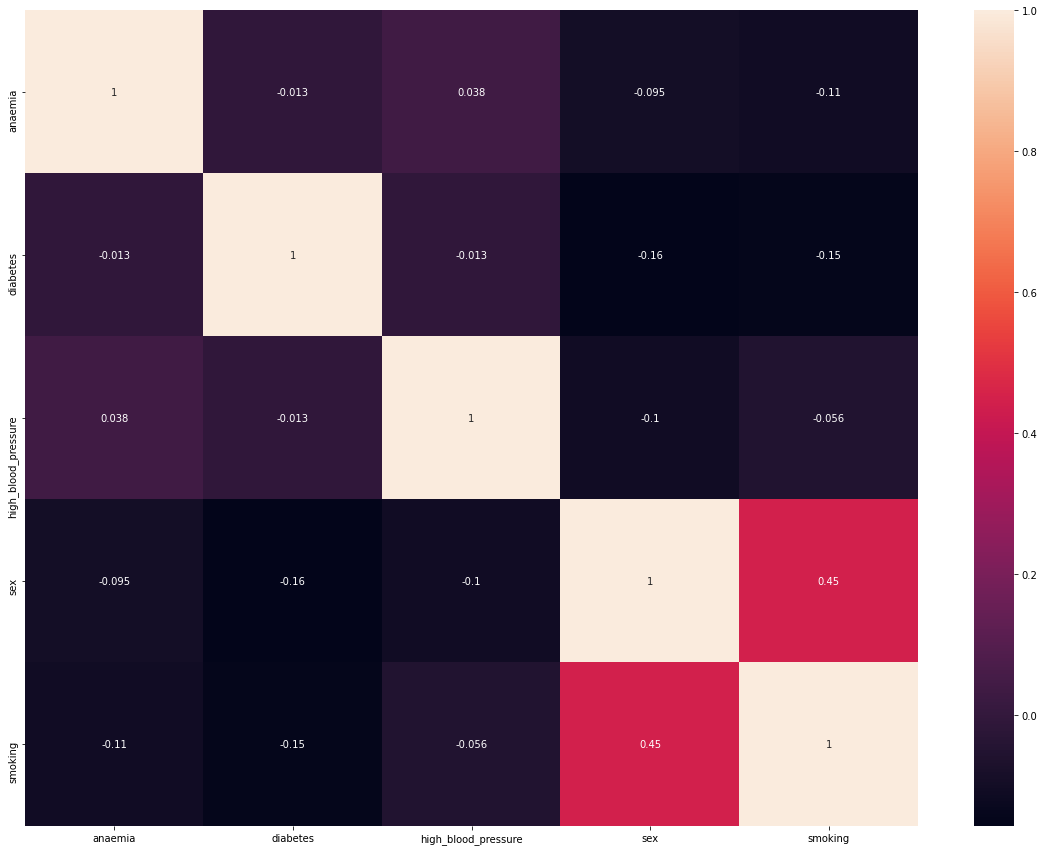

In [235]:
df_bin
corr_bin = df_bin.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_bin, annot=True)

**Comparando com resultados publicados na literatura**

O artigo de Chicco e Jurman de 2020 [1], analisou o mesmo dataset que utilizamos de 2015 referente a pacientes que sofreram ou não infarto. 
O estudo empregou dez algoritmos distintos de machine learning, sendo esses: Linear Regression, Random Forests, One Rule, Decision Tree, uma Artificial Neural Network (perceptron), dois Support Vector Machines (linear, e Gaussian radial kernel), k-Nearest Neighbors, Naïve Bayes, e Gradient Boosting.
Os autores concluíram que o algoritmo do Random Forest apresentou os melhores resultados predizendo a morte ou não dos pacientes. E assim como mencionamos, o aspecto do dataset ser pequeno, reduz a confiança também na análise final. 

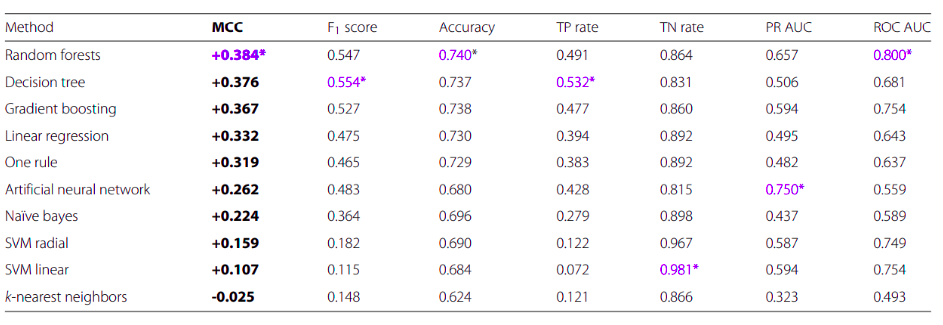

Alotaibi, em 2019 [2], publicou um estudo visando predizer a ocorrência de infarto nos pacientes a partir de um dataset do UCI de doenças cardíacas, e a partir deste ele separou aqueles pacientes que morreram de infarto. Ele avaliou cinco modelos de classificação, sendo esses Decision Tree, Naïve Bayes, Random Forest, Support Vector Machine, e Logistic Regression, e comparou esses resultados com resultados prévios. O autor pode também comparar com estudos anteriores, com distintas ferramentas de análise, e mensurar a acurácia de cada. Como conclusão, usando ML houve uma melhora na acurácia dos resultados, o modelo de Decision Tree apresentou maior valor, porém todos os modelos se encontram dentro da faixa de 85-95% de acurácia.

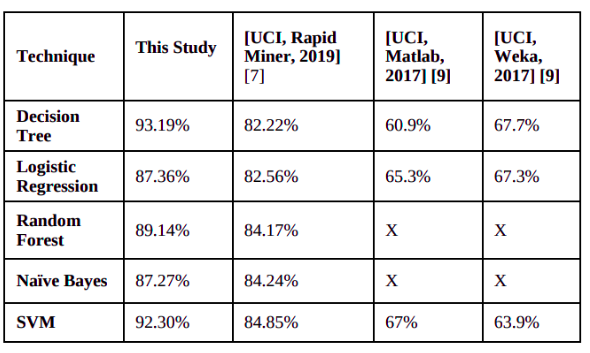

 





Fontes:

[1] https://web.archive.org/web/20200204104251/https://bmcmedinformdecismak.biomedcentral.com/track/pdf/10.1186/s12911-020-1023-5

[2] https://thesai.org/Downloads/Volume10No6/Paper_37-Implementation_of_Machine_Learning_Model.pdf